In [ ]:
import numpy as np

x = np.array([[1.0, 5.0]])  # shape: (1, 2)

W = np.array([
    [0.2, -0.5, 0.3, 1.0],
    [0.7, 0.1, -1.2, 0.4]
])  # shape: (2, 4)

b = np.array([0.1, -0.2, 0.0, 0.5])  # shape: (4,)

z = x @ W + b  # shape: (1, 4)  @ is equivalent to np.matmul(A, B). Other multiplication is result = x.dot(W)
z1 = x.dot(W) + b
print("z =", z)
print("z1 =", z1)

#Both operations are equivalent in 2D case.

z = [[ 3.8 -0.2 -5.7  3.5]]
z1 = [[ 3.8 -0.2 -5.7  3.5]]


In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

z2=a.dot(b)       # returns a scalar (dot product): 1*4 + 2*5 + 3*6 = 32
z3=a @ b          # same result: 32

z4=a.dot(b.T)     # same as above if b is 1D
print("a.dot(b) =", z2)
print("a @ b =", z3)
print("a.dot(b.T) =", z4)

a.dot(b) = 32
a @ b = 32
a.dot(b.T) = 32


In [ ]:
#But, np.dot() does not support broadcasting/batch operations with higher dimensions (3D+)
import numpy as np

# A: batch of 2 matrices, each 2x3
A = np.random.rand(2, 2, 3)

# B: batch of 2 matrices, each 3x1
B = np.random.rand(2, 3, 1)

# Use @ operator (equivalent to np.matmul)
C = A @ B

print("A shape:", A.shape)  # (2, 2, 3)
print("B shape:", B.shape)  # (2, 3, 1)
print("C shape:", C.shape)  # (2, 2, 1)
#Each batch (index 0 and 1) computes:(2×3) @ (3×1) → (2×1) So, C shape is (2,2,1)

A shape: (2, 2, 3)
B shape: (2, 3, 1)
C shape: (2, 2, 1)


In [ ]:
C1 = A.dot(B)  # ValueError! shapes (2, 2, 3) and (2, 3, 1) not aligned: 3 (dim 2) != 2 (dim 0)
# But worked in colab. Here, it internally converted to C1=np.dot(A,B)
print("C1 shape:", C1.shape)
#It broadcasts the first dimensions independently (2 in A, 2 in B) → cross product, giving (2, 2) Then it does (3,) @ (3, 1) → (1)
# → So you get (2, 2, 2, 1): a full outer product over the leading axis.

C1 shape: (2, 2, 2, 1)


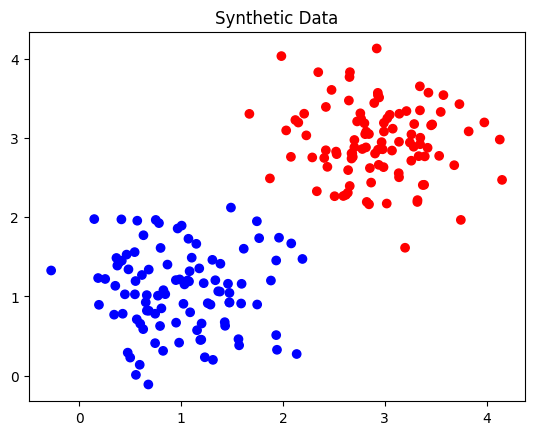

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Class 0: 100 points around (1,1)
class_0 = np.random.randn(100, 2) * 0.5 + np.array([1, 1])
labels_0 = np.zeros((100, 1))

# Class 1: 100 points around (3,3)
class_1 = np.random.randn(100, 2) * 0.5 + np.array([3, 3]) #it's controlling the spread and location of the points.

#np.random.randn(100, 2)creates 100 random points in 2D from a standard normal distribution (mean 0, std dev 1).
#* 0.5 standard deviation becomes 0.5.
#+ np.array([3, 3]): shifts the center of the points to (3,3).

labels_1 = np.ones((100, 1))

# Combine the data
X = np.vstack((class_0, class_1))
y = np.vstack((labels_0, labels_1))

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr')
plt.title("Synthetic Data")
plt.show()


(100,)
(100,)
[[-0.59865394 -1.11589699]
 [ 0.76666318  0.35629282]
 [-1.76853845  0.35548179]
 [ 0.81451982  0.05892559]
 [-0.18505367 -0.80764849]]
[-0.59865394  0.76666318 -1.76853845  0.81451982 -0.18505367]


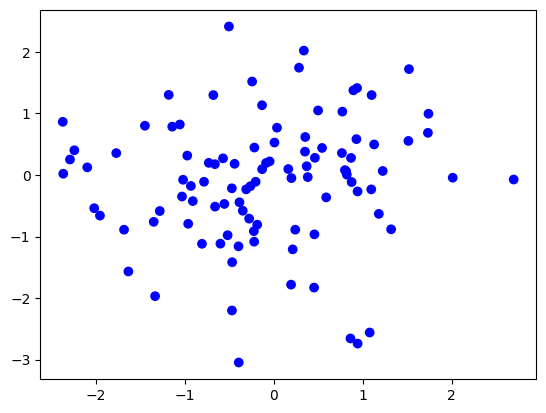

In [ ]:
arr = np.random.randn(100, 2)
print(arr[:,0].shape)
print(arr[:,1].shape)
print(arr[:5])
print(arr[:5,0])
plt.scatter(arr[:,0],arr[:,1],c=labels_0.ravel(),cmap='bwr')

# **Build a simple neural network**

Input (2 units) → Hidden Layer (4 units) → Output (1 unit with sigmoid)

**Initialize weights and biases**

In [ ]:
# Network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

***`Hidden Layer Weights — W1`***

input_size = 2 → each input is a 2D point

hidden_size = 4 → we want 4 neurons in the hidden layer

W1.shape = (2, 4)

In [ ]:
W1 = np.random.randn(input_size, hidden_size)
print(W1)

[[ 0.60512008  0.89555599 -0.13190864  0.40476181]
 [ 0.22384356  0.32962298  1.28598401 -1.5069984 ]]


***`Hidden Layer Bias — b1`***

In [ ]:
b1 = np.zeros((1, hidden_size))
print(b1)

[[0. 0. 0. 0.]]


***`Output Layer Weights and Bias -  W2 and b2`***

In [ ]:
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, 1))
print("W2:",W2,"\n b2:",b2)
print(W2.shape)

W2: [[ 0.67646073]
 [-0.38200896]
 [-0.22425893]
 [-0.30224973]] 
 b2: [[0.]]
(4, 1)


# **Forward pass**

**Hidden layer:**

*   Z1=X.W1+b1
*   A1=ReLU(Z1)

*ReLU(x)=max(0,x)*

**Output layer:**

*   Z2=X.W2+b2
*   A2=Sigmoid(Z2)


In [ ]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
Z1 = X @ W1 + b1         # shape: (200, 4)
A1 = relu(Z1)            # shape: (200, 4)

Z2 = A1 @ W2 + b2        # shape: (200, 1)
A2 = sigmoid(Z2)         # shape: (200, 1)


In [ ]:
print(A2.shape)
print(A2[1:10])

(200, 1)
[[0.39813104]
 [0.5122781 ]
 [0.47497222]
 [0.44397441]
 [0.4133182 ]
 [0.46375498]
 [0.45302539]
 [0.48330852]
 [0.4903366 ]]


# **Compute Loss**

binary cross-entropy loss: Loss=−1/𝑁∑[𝑦log⁡(𝑦^)+(1−𝑦)log⁡(1−𝑦^)]


In [ ]:
def compute_loss(y_true, y_pred):
    eps = 1e-7  # small value to avoid log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)  # clip for safety
#Note: if y_pred = 0, then log(y_pred) becomes log(0) → undefined
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

loss = compute_loss(y, A2)
print("Loss:", loss)


Loss: 0.787220738654232


# **Backpropagation**
**Key steps:**


1.   Compute derivative of loss w.r.t. A2 (prediction)
2.   Backpropagate through sigmoid to get dZ2
1.   Then calculate gradients for W2, b2
2.   Backpropagate through ReLU and W1 to get dW1, db1

In [ ]:
# Backprop step 1: output layer
dZ2 = A2 - y                         # shape: (200, 1)
dW2 = A1.T @ dZ2 / len(X)           # shape: (4, 1)
db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

***`Why is dZ2 = A2 - y?`***

(Hint: think about the derivative of binary cross-entropy loss when sigmoid is used.)

Sigmoid:𝐴2=1/(1+𝑒^(−𝑍2))

binary cross-entropy loss: Loss=−[𝑦log⁡(A2)+(1−𝑦)log⁡(1−A2)]

the derivative of binary cross-entropy loss combined with the sigmoid activation: ∂Loss/∂Z2 =A2−y


In [ ]:
dZ2 = A2 - y
dW2 = A1.T @ dZ2 / len(X)
db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)
#db2 = np.sum(dZ2) / len(X)
#keepdims=True retains the number of dimensions, so the shape is preserved for future addition or updates

In [ ]:
# Backprop step 2: hidden layer
dA1 = dZ2 @ W2.T                  # (200, 4)
dZ1 = dA1 * (Z1 > 0)              # ReLU derivative
dW1 = X.T @ dZ1 / len(X)
db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

***`Why is dZ1 = dA1 (Z1 > 0)?`***

Derivative of the ReLU activation:
ReLU′(z)={ 1  if z>0;
           0  therwise​}

In [ ]:
dZ1 = dA1 * (Z1 > 0)

**Update weights using gradient descent**


In [ ]:
lr = 0.1  # learning rate

# Update output layer weights
W2 -= lr * dW2
b2 -= lr * db2

# Update hidden layer weights
W1 -= lr * dW1
b1 -= lr * db1

# **Repeat the process over multiple epochs**

In [ ]:
epochs = 1000
lr = 0.1

for epoch in range(epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    # Loss
    loss = compute_loss(y, A2)

    # Backpropagation
    dZ2 = A2 - y
    dW2 = A1.T @ dZ2 / len(X)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * (Z1 > 0)
    dW1 = X.T @ dZ1 / len(X)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.6310
Epoch 100: Loss = 0.2201
Epoch 200: Loss = 0.1032
Epoch 300: Loss = 0.0628
Epoch 400: Loss = 0.0445
Epoch 500: Loss = 0.0344
Epoch 600: Loss = 0.0281
Epoch 700: Loss = 0.0238
Epoch 800: Loss = 0.0207
Epoch 900: Loss = 0.0183


**Evaluate how well it learned by making predictions**

In [ ]:
# Predict: convert probabilities to class labels
preds = (A2 > 0.5).astype(int)

#A2 > 0.5 compares each predicted value (a probability between 0 and 1) to 0.5.

#It returns a Boolean array:

                #True if the value > 0.5 (likely class 1)

                #False if ≤ 0.5 (likely class 0)

#.astype(int) converts True → 1, and False → 0

#more than 50% chance of class 1 → call it class 1

# Accuracy
accuracy = np.mean(preds == y)
print("Final Accuracy:", accuracy)

#gives the fraction of correct predictions.

Final Accuracy: 1.0


# **Visualize the Decision Boundary**

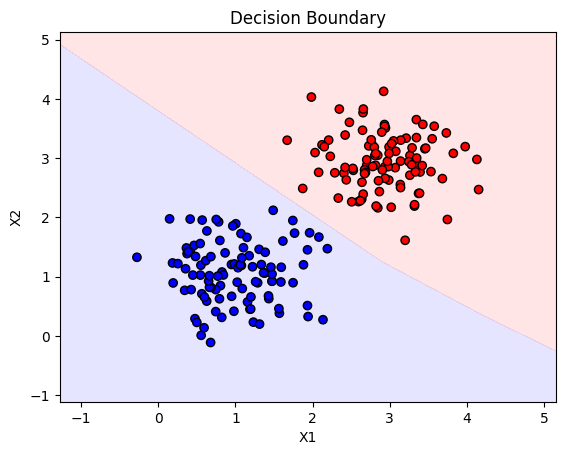

In [ ]:
# Create a meshgrid over the input space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid and make predictions
grid = np.c_[xx.ravel(), yy.ravel()] # concatenates the flattened meshgrid arrays xx and yy column-wise to create a list of 2D points for prediction.
#Matlab equivalent: grid = [xx(:), yy(:)];
# grid: (num_points, 2), each row is a [x1, x2] point


# Forward pass on grid
Z1 = grid @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
A2 = sigmoid(Z2)

# Class prediction
Z = A2.reshape(xx.shape)

# Plot decision boundary and original points
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.2)
#The contourf function fills regions between contour levels.

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr", edgecolors='k')
plt.title("Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [ ]:
print(grid.shape)
print(x_min, y_min, x_max, y_max,xx[0,0],yy[0,0])

(40000, 2)
-1.2764949079170393 -1.1117015761122133 5.151958348841971 5.128361748649104 -1.2764949079170393 -1.1117015761122133


# **Test: Hidden Units [1,2,3,4] - Comparison**

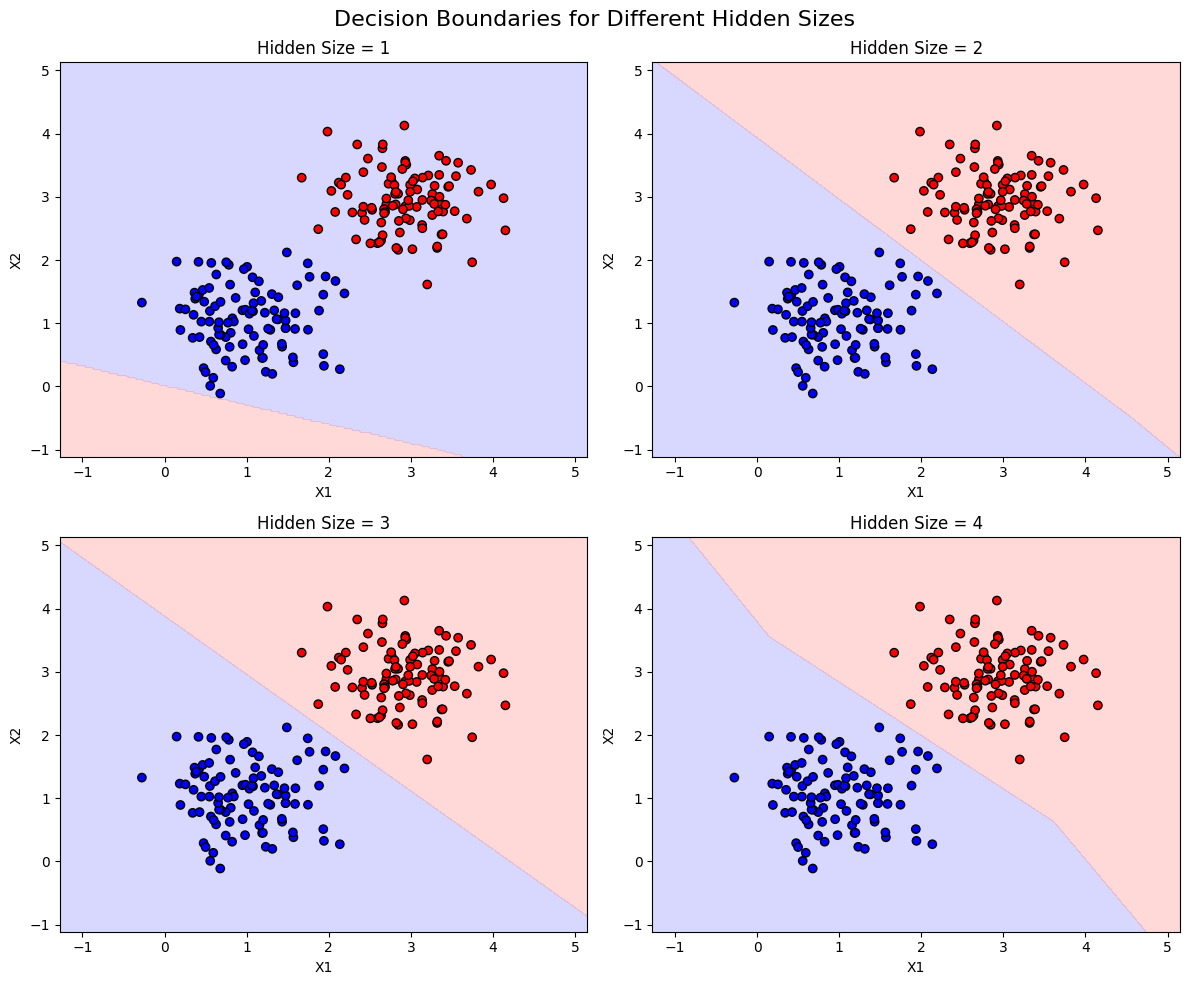

In [ ]:
# Generate synthetic data (XOR-like)
#np.random.seed(42)
#X = np.random.randn(200, 2)
#y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)  # simple non-linear pattern

hidden_sizes = [1, 2, 3, 4]
epochs = 1000
lr = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, hidden_size in enumerate(hidden_sizes):
    # Initialize weights
    W1 = np.random.randn(2, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1)
    b2 = np.zeros((1, 1))

    # Train the model
    for epoch in range(epochs):
        Z1 = X @ W1 + b1
        A1 = relu(Z1)
        Z2 = A1 @ W2 + b2
        A2 = sigmoid(Z2)

        # Backprop
        dZ2 = A2 - y
        dW2 = A1.T @ dZ2 / len(X)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)
        dA1 = dZ2 @ W2.T
        dZ1 = dA1 * (Z1 > 0)
        dW1 = X.T @ dZ1 / len(X)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

        # Update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z1 = grid @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
    Z = A2.reshape(xx.shape)

    ax = axes[idx]
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr", edgecolors='k')
    ax.set_title(f"Hidden Size = {hidden_size}")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

plt.suptitle("Decision Boundaries for Different Hidden Sizes", fontsize=16)
plt.tight_layout()
plt.show()


# **Add Noise to the Data**

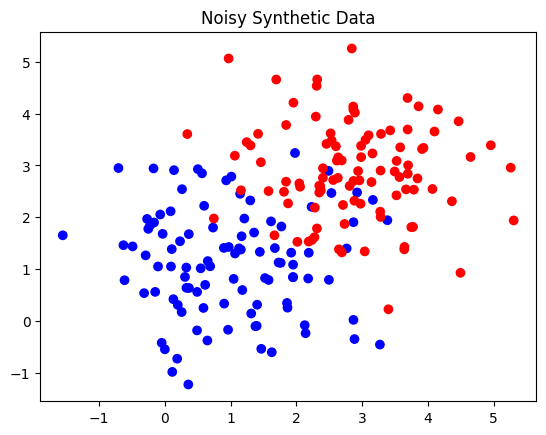

In [ ]:
np.random.seed(0)

# Class 0: More spread out (std dev = 1.0)
class_0 = np.random.randn(100, 2) * 1.0 + np.array([1, 1])
labels_0 = np.zeros((100, 1))

# Class 1: More spread out (std dev = 1.0)
class_1 = np.random.randn(100, 2) * 1.0 + np.array([3, 3])
labels_1 = np.ones((100, 1))

# Combine
X = np.vstack((class_0, class_1))
y = np.vstack((labels_0, labels_1))

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr')
plt.title("Noisy Synthetic Data")
plt.show()


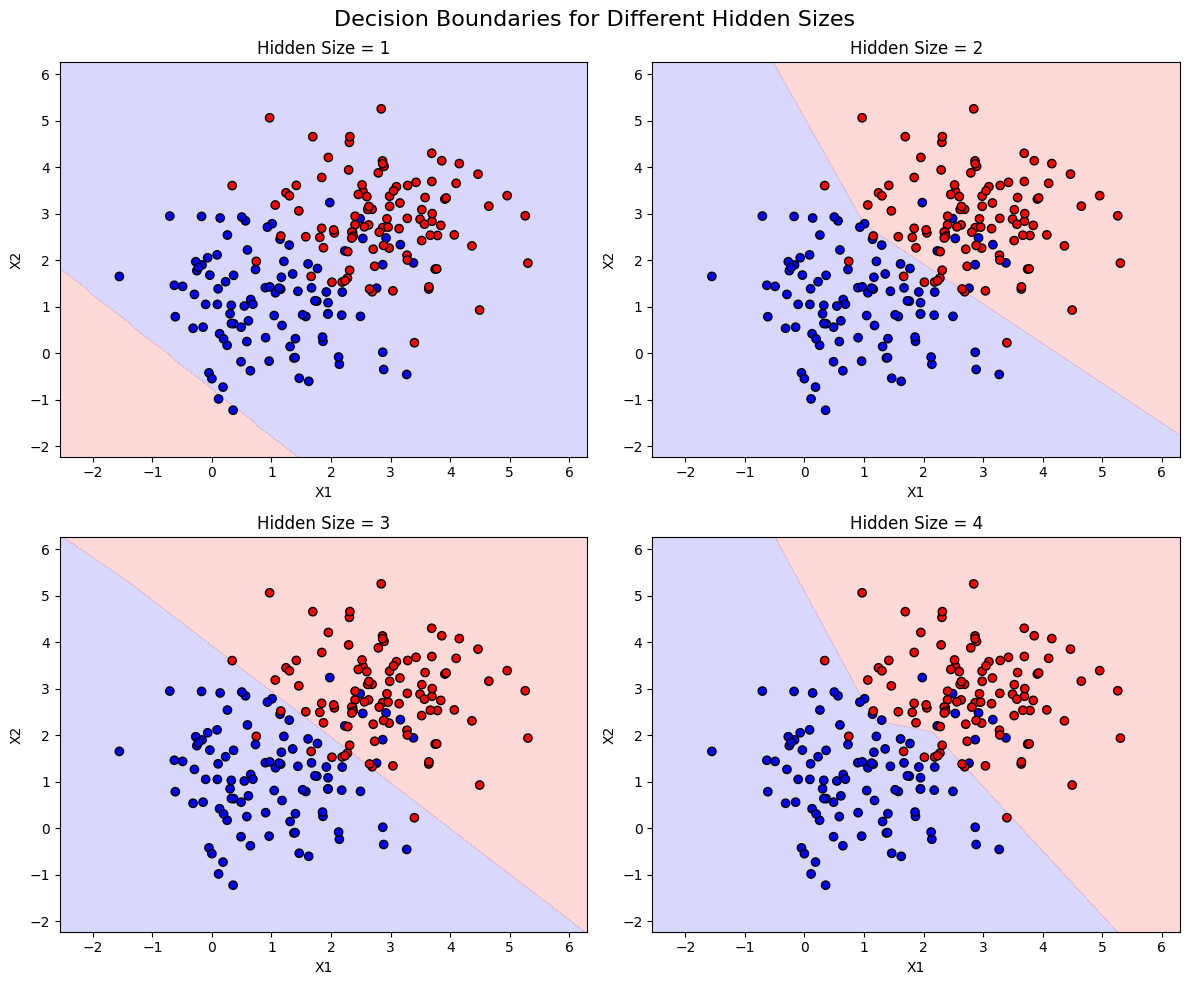

In [ ]:
hidden_sizes = [1, 2, 3, 4]
epochs = 1000
lr = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, hidden_size in enumerate(hidden_sizes):
    # Initialize weights
    W1 = np.random.randn(2, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1)
    b2 = np.zeros((1, 1))

    # Train the model
    for epoch in range(epochs):
        Z1 = X @ W1 + b1
        A1 = relu(Z1)
        Z2 = A1 @ W2 + b2
        A2 = sigmoid(Z2)

        # Backprop
        dZ2 = A2 - y
        dW2 = A1.T @ dZ2 / len(X)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)
        dA1 = dZ2 @ W2.T
        dZ1 = dA1 * (Z1 > 0)
        dW1 = X.T @ dZ1 / len(X)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

        # Update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z1 = grid @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
    Z = A2.reshape(xx.shape)

    ax = axes[idx]
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr", edgecolors='k')
    ax.set_title(f"Hidden Size = {hidden_size}")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

plt.suptitle("Decision Boundaries for Different Hidden Sizes", fontsize=16)
plt.tight_layout()
plt.show()

# **Add a second hidden layer**

Epoch 0: Loss = 0.7757
Epoch 100: Loss = 0.6934
Epoch 200: Loss = 0.3672
Epoch 300: Loss = 0.2835
Epoch 400: Loss = 0.2619
Epoch 500: Loss = 0.2531
Epoch 600: Loss = 0.2482
Epoch 700: Loss = 0.2451
Epoch 800: Loss = 0.2428
Epoch 900: Loss = 0.2411


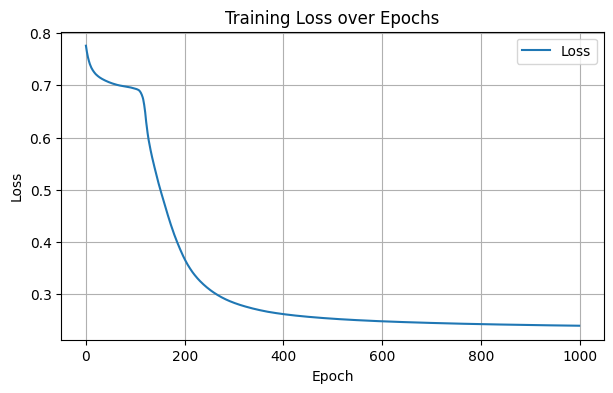

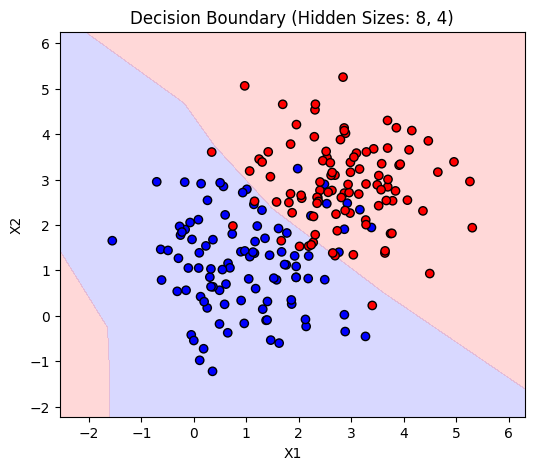

In [ ]:
# Updated sizes
input_size = 2
hidden1_size = 8
hidden2_size = 4
output_size = 1

epochs = 1000
lr = 0.1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden1_size)
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size)
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, output_size)
b3 = np.zeros((1, output_size))

losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)

    Z3 = A2 @ W3 + b3
    A3 = sigmoid(Z3)

    # Compute and store loss
    loss = compute_loss(y, A3)
    losses.append(loss)

    # Backward pass
    dZ3 = A3 - y
    dW3 = A2.T @ dZ3 / len(X)
    db3 = np.sum(dZ3, axis=0, keepdims=True) / len(X)

    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * (Z2 > 0)
    dW2 = A1.T @ dZ2 / len(X)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * (Z1 > 0)
    dW1 = X.T @ dZ1 / len(X)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

    # Update weights
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Plot loss curve
plt.figure(figsize=(7, 4))
plt.plot(losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.legend()
plt.show()

# Decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
Z1 = grid @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
A2 = relu(Z2)
Z3 = A2 @ W3 + b3
A3 = sigmoid(Z3)
Z = A3.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr", edgecolors='k')
plt.title("Decision Boundary (Hidden Sizes: 8, 4)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
